In [1]:

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve


In [3]:
df=pd.read_csv('D:/UIUC_courses/IE517/IE517_FY21_HW6/ccdefault.csv')
print("Raw Dataset: first 5 rows")
print(df.head())
print()
print("Raw Dataset:info")
print(df.describe())

Raw Dataset: first 5 rows
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0      

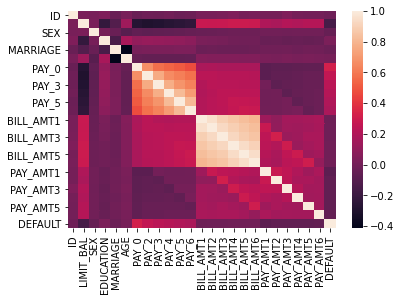

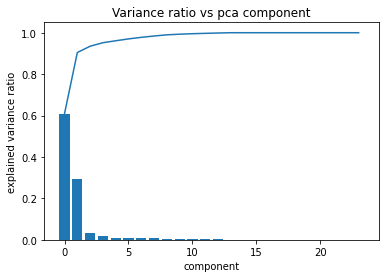

In [4]:
corr_mat=df.corr()
sns.heatmap(corr_mat)
plt.show()
df2=df.values
X=df2[:,:-1]
y=df2[:,-1]
score=[]
score1=[]
f1=[]
p_score=[]
recall=[]
pca_test=PCA()
pca_test.fit(X)
plt.bar(range(pca_test.n_components_),pca_test.explained_variance_ratio_)
plt.plot(range(pca_test.n_components_),np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('component')
plt.ylabel('explained variance ratio')
plt.title('Variance ratio vs pca component')
plt.show()

In [5]:
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=i, stratify=y)
    pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=8)), ('dec_tree', tree.DecisionTreeClassifier(max_depth=4) )])
    pipe.fit(X_train,y_train)
    score.append(pipe.score(X_test,y_test))
    y_predict=pipe.predict(X_test)
    f1.append(f1_score(y_predict,y_test))
    p_score.append(precision_score(y_predict,y_test))
    recall.append(recall_score(y_predict,y_test))
    
print('mean accuracy without stratified k fold:',str(np.mean(score)))
print('standard accuracy deviation without stratified k fold:',str(np.std(score)))
print()
print('mean f1 score without stratified k fold:',str(np.mean(f1)))
print('standard deviation f1 score without stratified k fold:',str(np.std(f1)))
print()
print('mean recall without stratified k fold:',str(np.mean(recall)))
print('standard deviation of recall without stratified k fold:',str(np.std(recall)))
print()
print('mean precision score without stratified k fold:',str(np.mean(p_score)))
print('standard deviation of precision score without stratified k fold:',str(np.std(p_score)))
print()
print('Out of sample score',pipe.score(X_test,y_test))

mean accuracy without stratified k fold: 0.8035666666666665
standard accuracy deviation without stratified k fold: 0.0060828538623832655

mean f1 score without stratified k fold: 0.3968716890882492
standard deviation f1 score without stratified k fold: 0.024484225987563175

mean recall without stratified k fold: 0.6196479658547237
standard deviation of recall without stratified k fold: 0.030952820098523737

mean precision score without stratified k fold: 0.29246987951807235
standard deviation of precision score without stratified k fold: 0.023309828209573315

Out of sample score 0.8046666666666666


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=4)), ('dec_tree', tree.DecisionTreeClassifier(max_depth=3) )])
skf = StratifiedKFold(n_splits=10)
score1=cross_val_score(pipe, X_train, y_train, cv=skf)
pipe.fit(X_train,y_train)

print()
print('mean with stratified k fold:',str(np.mean(score1)))
print('standard deviation with stratified k fold:',str(np.std(score1)))
print('Out of sample score',pipe.score(X_test,y_test))

print('f1 score:',str(f1_score(y_predict,y_test)))
print('precision score',str(precision_score(y_predict,y_test)))
print('recall score',str(recall_score(y_predict,y_test)))
print(confusion_matrix(y_test,pipe.predict(X_test)))
print("we have 130 false positives in 3000 test samples (<0.5 false positive rate)")


mean with stratified k fold: 0.8025185185185185
standard deviation with stratified k fold: 0.0032279642325186526
Out of sample score 0.797
f1 score: 0.1465863453815261
precision score 0.10993975903614457
recall score 0.21987951807228914
[[2206  130]
 [ 479  185]]
we have 130 false positives in 3000 test samples (<0.5 false positive rate)


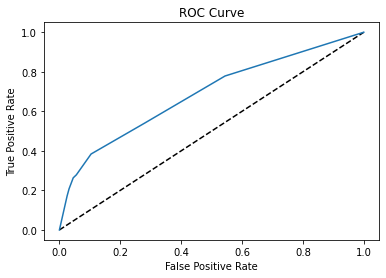

In [7]:
# ROC Curve


y_pred_prob = pipe.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [8]:
print("My name is Prajwal Chinthoju")
print("My NetID is: pkc3")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Prajwal Chinthoju
My NetID is: pkc3
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
